# Análise Exploratória

## Pacotes e dados

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.dates import date2num
from datetime import datetime
import seaborn as sns
sns.set(style='ticks', font_scale=1.4)
import pyreadr
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression

In [7]:
all_flights = pd.concat([rota_solimoes, rota_caipira], ignore_index=True)
rota_caipira = pd.read_csv('C:/Users/User/OneDrive/Área de Trabalho/Untitled Folder 1/rota_caipira.csv')
rota_solimoes = pd.read_csv('C:/Users/User/OneDrive/Área de Trabalho/Untitled Folder 1/rota_solimoes.csv')

## Missings e Duplicatas

In [8]:
print('MISSING NAS BASES DE DADOS:')
print(all_flights.isna().sum())
print(rota_caipira.isna().sum())
print(rota_solimoes.isna().sum())

print('')

MISSING NAS BASES DE DADOS:
Unnamed: 0           0
year_week            0
total_flights        0
average_duration     0
variance_duration    0
dtype: int64
Unnamed: 0           0
year_week            0
total_flights        0
average_duration     0
variance_duration    0
dtype: int64
Unnamed: 0           0
year_week            0
total_flights        0
average_duration     0
variance_duration    0
dtype: int64



In [9]:
print(f'Duplicatas: {all_flights.duplicated().sum()}, ({np.round(100*all_flights.duplicated().sum()/len(all_flights),1)}%)')
print(f'Duplicatas: {rota_caipira.duplicated().sum()}, ({np.round(100*rota_caipira.duplicated().sum()/len(rota_caipira),1)}%)')
print(f'Duplicatas: {rota_solimoes.duplicated().sum()}, ({np.round(100*rota_solimoes.duplicated().sum()/len(rota_solimoes),1)}%)')

Duplicatas: 0, (0.0%)
Duplicatas: 0, (0.0%)
Duplicatas: 0, (0.0%)


### Retirando Outlier

In [13]:
sorted_df = rota_caipira.sort_values(by='average_duration', ascending=False)

# Pegue os 5 primeiros valores do DataFrame ordenado
top_5_values = sorted_df.head(5)

# Imprima os 5 maiores valores
print(top_5_values)

     Unnamed: 0 year_week  total_flights  average_duration  variance_duration
161         162   2021_09             10      14870.600000       7.408909e+08
165         166   2021_13             10       7288.000000       4.434633e+08
167         168   2021_15              9       6000.222222       1.893557e+08
154         155   2021_02             45       4495.288889       4.970678e+08
176         177   2021_24             22       3610.818182       6.771030e+07


In [14]:
top_2_values = rota_caipira['average_duration'].nlargest(2)

# Calcule a média da coluna 'average_duration'
average_duration_mean = rota_caipira['average_duration'].mean()

# Substitua os dois maiores valores pela média
for value in top_2_values.index:
    rota_caipira.at[value, 'average_duration'] = average_duration_mean

In [70]:
rota_solimoes['year_month'] = pd.to_datetime(rota_solimoes['year_week'] + '-0', format='%Y_%U-%w').dt.strftime('%Y-%m')
rota_caipira['year_month'] = pd.to_datetime(rota_caipira['year_week'] + '-0', format='%Y_%U-%w').dt.strftime('%Y-%m')

print(rota_solimoes[['year_week', 'year_month']].head())
print(rota_caipira[['year_week', 'year_month']].head())

  year_week year_month
0   2018_01    2018-01
1   2018_02    2018-01
2   2018_03    2018-01
3   2018_04    2018-01
4   2018_05    2018-02
  year_week year_month
0   2018_01    2018-01
1   2018_02    2018-01
2   2018_03    2018-01
3   2018_04    2018-01
4   2018_05    2018-02


# EDA

## Estatísticas Descritivas e Covariância

In [3]:
estatisticas_solimoes = rota_solimoes[['total_flights', 'average_duration']].describe()

estatisticas_caipira = rota_caipira[['total_flights', 'average_duration']].describe()

estatisticas_total = all_flights[['total_flights', 'average_duration']].describe()


covariancia_solimoes = rota_solimoes[['total_flights', 'average_duration']].cov().loc['total_flights', 'average_duration']

covariancia_caipira = rota_caipira[['total_flights', 'average_duration']].cov().loc['total_flights', 'average_duration']

covariancia_total = all_flights[['total_flights', 'average_duration']].cov().loc['total_flights', 'average_duration']


print("Estatísticas Descritivas para Solimoes:")
print(estatisticas_solimoes)

print("\nEstatísticas Descritivas para Caipira:")
print(estatisticas_caipira)

print("\nEstatísticas Descritivas para Total:")
print(estatisticas_total)



print("\nCovariância entre total_flights e average_duration para Solimoes:", covariancia_solimoes)
print("Covariância entre total_flights e average_duration para Caipira:", covariancia_caipira)
print("Covariância entre total_flights e average_duration para Total:", covariancia_total)

Estatísticas Descritivas para Solimoes:
       total_flights  average_duration
count     205.000000        205.000000
mean      186.921951       2166.490773
std       112.479426        853.239197
min        19.000000        533.575758
25%       102.000000       1564.782051
50%       167.000000       2038.195652
75%       259.000000       2740.296296
max       537.000000       5243.122807

Estatísticas Descritivas para Caipira:
       total_flights  average_duration
count     205.000000        205.000000
mean      105.697561       1239.003408
std        82.697098       1293.880891
min         3.000000        198.876712
25%        52.000000        634.800000
50%        83.000000        989.755102
75%       135.000000       1493.759740
max       435.000000      14870.600000

Estatísticas Descritivas para Total:
       total_flights  average_duration
count     205.000000        205.000000
mean      366.692683       1497.495973
std       219.025758        700.522132
min        25.000000    

## Total de Voos

In [5]:
soma_all_flights = all_flights['total_flights'].sum()
soma_rota_caipira = rota_caipira['total_flights'].sum()
soma_rota_solimoes = rota_solimoes['total_flights'].sum()

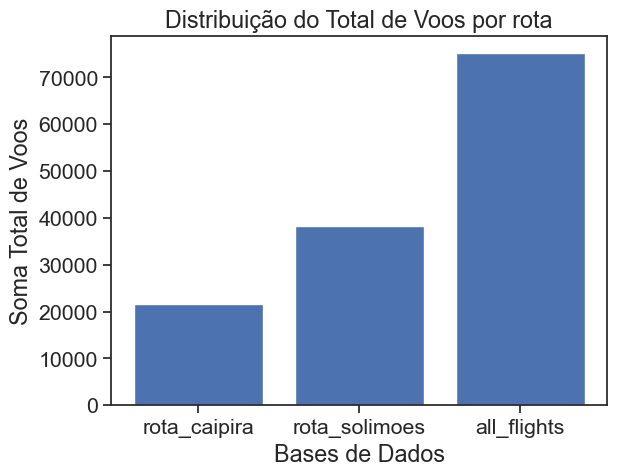

In [10]:
bases = ['rota_caipira', 'rota_solimoes', 'all_flights']
somas = [ soma_rota_caipira, soma_rota_solimoes, soma_all_flights]

plt.bar(bases, somas)
plt.xlabel('Bases de Dados')
plt.ylabel('Soma Total de Voos')
plt.title('Distribuição do Total de Voos por rota')
plt.show() 

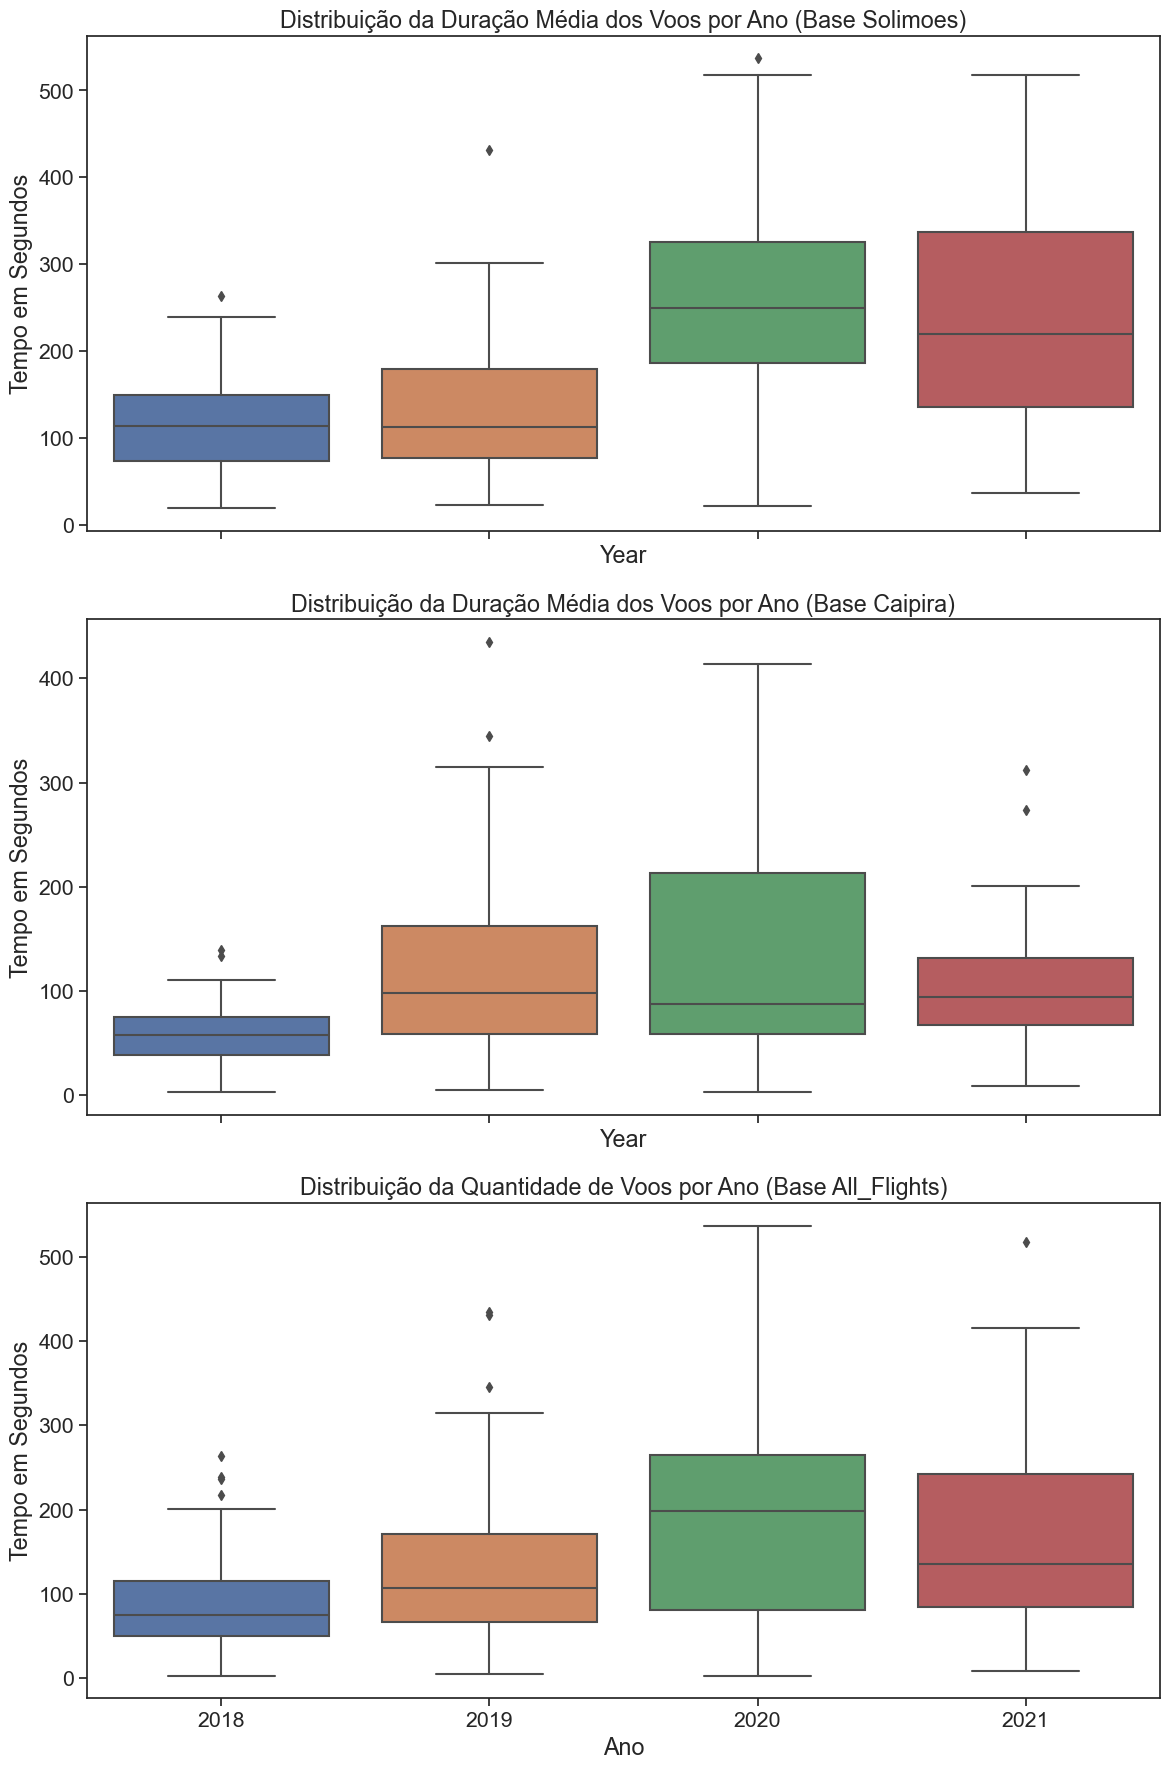

In [63]:
rota_solimoes['Year'] = rota_solimoes['year_week'].str[:4]
rota_caipira['Year'] = rota_caipira['year_week'].str[:4]
all_flights['Year'] = all_flights['year_week'].str[:4]

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18), sharex=True)

# Create a boxplot for Solimoes
sns.boxplot(data=rota_solimoes, x='Year', y='total_flights', ax=axes[0])
axes[0].set_ylabel('Tempo em Segundos')
axes[0].set_title('Distribuição da Duração Média dos Voos por Ano (Base Solimoes)')

# Create a boxplot for Caipira
sns.boxplot(data=rota_caipira, x='Year', y='total_flights', ax=axes[1])
axes[1].set_ylabel('Tempo em Segundos')
axes[1].set_title('Distribuição da Duração Média dos Voos por Ano (Base Caipira)')

# Create a boxplot for All_Flights
sns.boxplot(data=all_flights, x='Year', y='total_flights', ax=axes[2])
axes[2].set_xlabel('Ano')
axes[2].set_ylabel('Tempo em Segundos')
axes[2].set_title('Distribuição da Quantidade de Voos por Ano (Base All_Flights)')

plt.tight_layout()
plt.show()

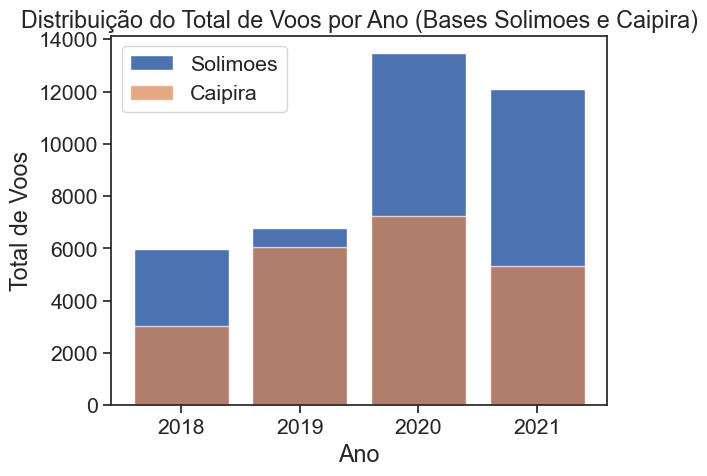

In [10]:
distribuicao_solimoes = rota_solimoes.groupby(rota_solimoes['year_week'].str[:4])['total_flights'].sum()

distribuicao_caipira = rota_caipira.groupby(rota_caipira['year_week'].str[:4])['total_flights'].sum()

plt.bar(distribuicao_solimoes.index, distribuicao_solimoes.values, label='Solimoes')
plt.bar(distribuicao_caipira.index, distribuicao_caipira.values, label='Caipira', alpha=0.7)  
plt.xlabel('Ano')
plt.ylabel('Total de Voos')
plt.title('Distribuição do Total de Voos por Ano (Bases Solimoes e Caipira)')
plt.legend()
plt.show()

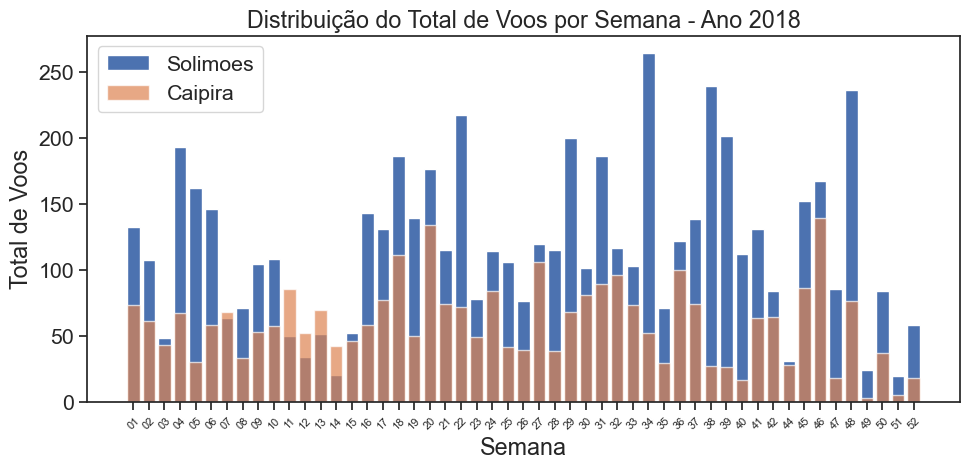

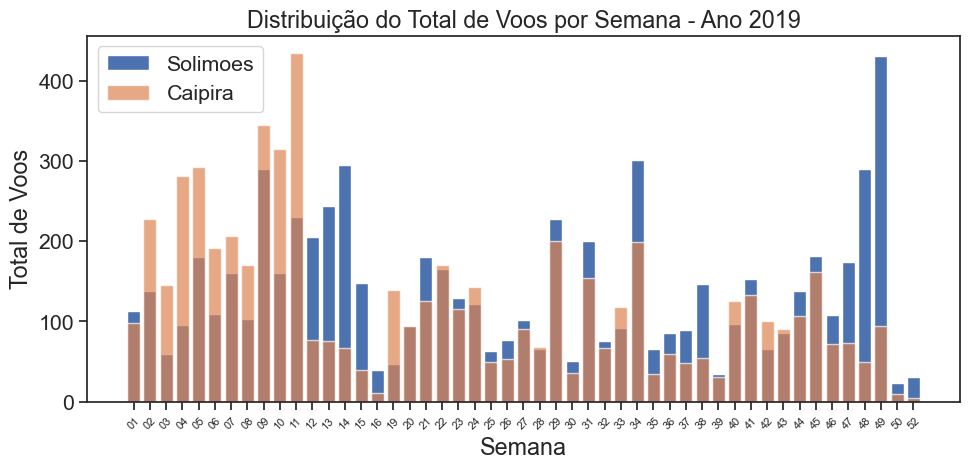

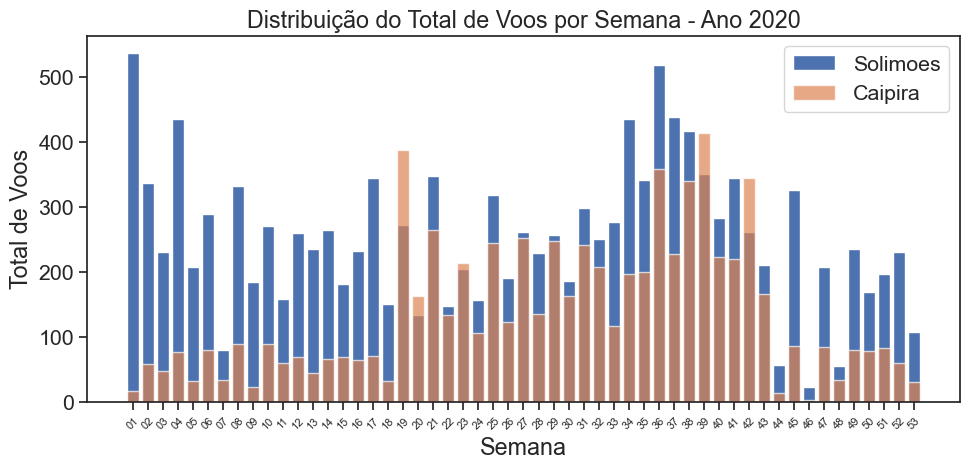

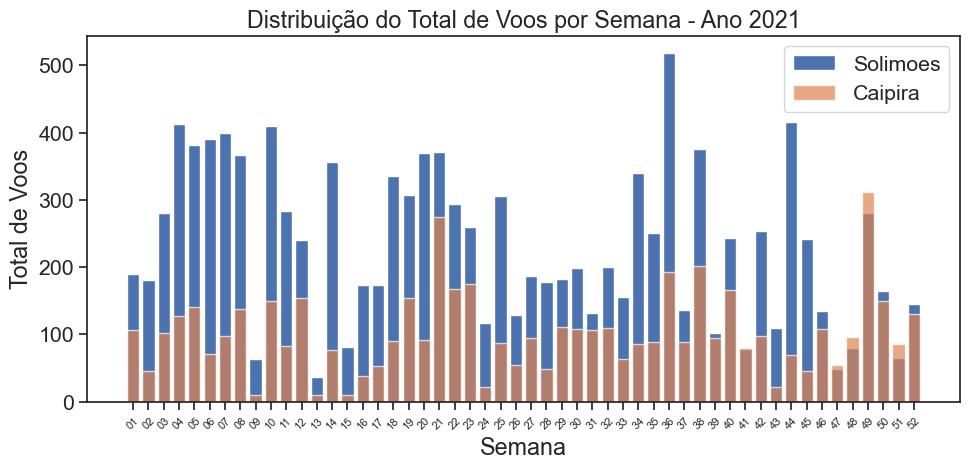

In [11]:
distribuicao_solimoes = rota_solimoes.groupby('year_week')['total_flights'].sum()

distribuicao_caipira = rota_caipira.groupby('year_week')['total_flights'].sum()

anos = ['2018', '2019', '2020', '2021']

for ano in anos:
    distribuicao_solimoes_ano = distribuicao_solimoes[distribuicao_solimoes.index.str.startswith(ano)]
    distribuicao_caipira_ano = distribuicao_caipira[distribuicao_caipira.index.str.startswith(ano)]

    plt.figure(figsize=(10, 5))
    plt.bar(distribuicao_solimoes_ano.index.str[-2:], distribuicao_solimoes_ano.values, label='Solimoes')
    plt.bar(distribuicao_caipira_ano.index.str[-2:], distribuicao_caipira_ano.values, label='Caipira', alpha=0.7)
    
    plt.xlabel('Semana')
    plt.ylabel('Total de Voos')
    plt.title(f'Distribuição do Total de Voos por Semana - Ano {ano}')
    plt.xticks(rotation=45, fontsize=8)  
    plt.legend()
    plt.tight_layout()
    plt.show()

Contatenando as semanas em meses:

In [24]:
rota_solimoes['year_month'] = pd.to_datetime(rota_solimoes['year_week'] + '-0', format='%Y_%U-%w').dt.strftime('%Y-%m')
rota_caipira['year_month'] = pd.to_datetime(rota_caipira['year_week'] + '-0', format='%Y_%U-%w').dt.strftime('%Y-%m')

print(rota_solimoes[['year_week', 'year_month']].head())
print(rota_caipira[['year_week', 'year_month']].head())


  year_week year_month
0   2018_01    2018-01
1   2018_02    2018-01
2   2018_03    2018-01
3   2018_04    2018-01
4   2018_05    2018-02
  year_week year_month
0   2018_01    2018-01
1   2018_02    2018-01
2   2018_03    2018-01
3   2018_04    2018-01
4   2018_05    2018-02


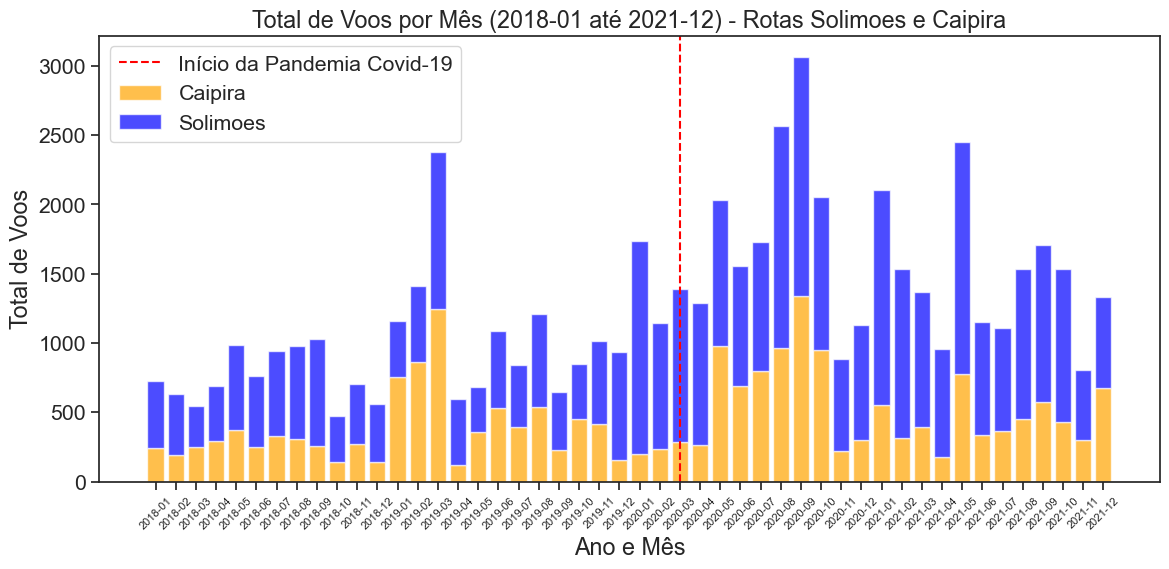

In [13]:
rota_solimoes['year_month'] = pd.to_datetime(rota_solimoes['year_week'] + '-0', format='%Y_%U-%w').dt.strftime('%Y-%m')
rota_caipira['year_month'] = pd.to_datetime(rota_caipira['year_week'] + '-0', format='%Y_%U-%w').dt.strftime('%Y-%m')

rota_solimoes['Rota'] = 'Solimoes'
rota_caipira['Rota'] = 'Caipira'
rotas_concatenadas = pd.concat([rota_solimoes, rota_caipira])

rotas_concatenadas = rotas_concatenadas[(rotas_concatenadas['year_month'] >= '2018-01') & (rotas_concatenadas['year_month'] <= '2021-12')]

distribuicao_rotas = rotas_concatenadas.groupby(['year_month', 'Rota'])['total_flights'].sum().unstack()

plt.figure(figsize=(12, 6))
colors = ['orange', 'blue']  
bottom = None
for rota, color in zip(distribuicao_rotas.columns, colors):
    plt.bar(distribuicao_rotas.index, distribuicao_rotas[rota], color=color, alpha=0.7, label=rota, bottom=bottom)
    if bottom is None:
        bottom = distribuicao_rotas[rota]
    else:
        bottom += distribuicao_rotas[rota]

plt.axvline(x='2020-03', color='red', linestyle='--', label='Início da Pandemia Covid-19')

plt.xticks(rotation=45, fontsize=8)

plt.xlabel('Ano e Mês')
plt.ylabel('Total de Voos')
plt.title('Total de Voos por Mês (2018-01 até 2021-12) - Rotas Solimoes e Caipira')
plt.legend()
plt.tight_layout()
plt.show()

## Duração Média dos Voos

# Fazer em whisky plot

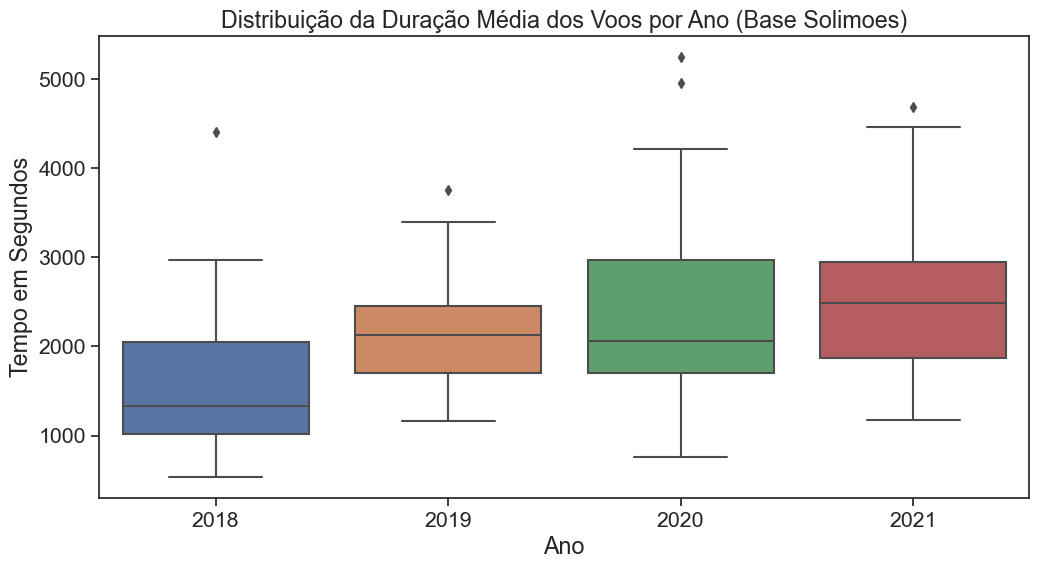

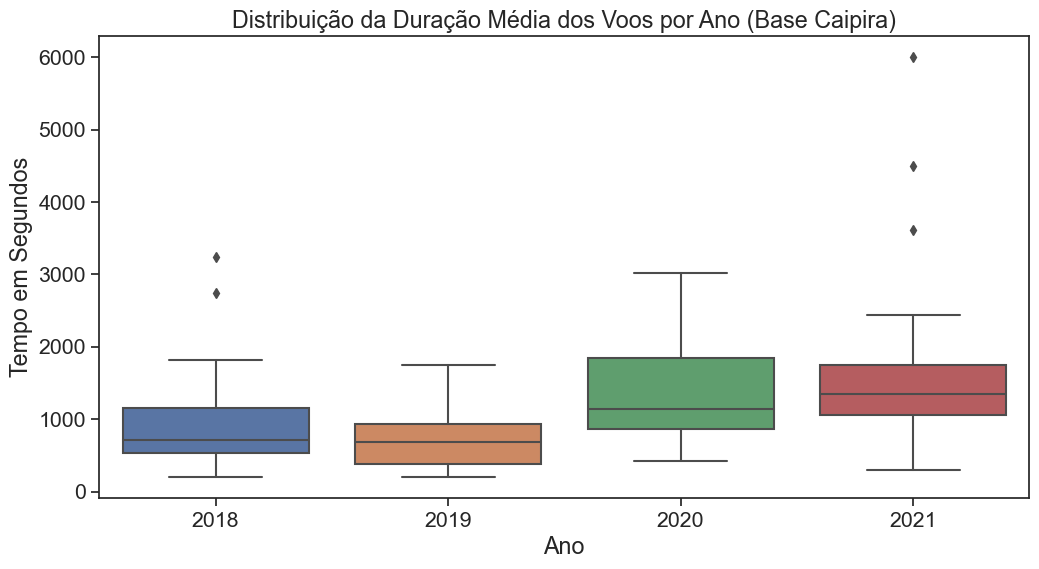

In [68]:
rota_solimoes['Year'] = rota_solimoes['year_week'].str[:4]
rota_caipira['Year'] = rota_caipira['year_week'].str[:4]

# Create a boxplot for Solimoes
plt.figure(figsize=(12, 6))
sns.boxplot(data=rota_solimoes, x='Year', y='average_duration')
plt.xlabel('Ano')
plt.ylabel('Tempo em Segundos')
plt.title('Distribuição da Duração Média dos Voos por Ano (Base Solimoes)')
plt.show()

# Create a boxplot for Caipira
plt.figure(figsize=(12, 6))
sns.boxplot(data=rota_caipira, x='Year', y='average_duration')
plt.xlabel('Ano')
plt.ylabel('Tempo em Segundos')
plt.title('Distribuição da Duração Média dos Voos por Ano (Base Caipira)')
plt.show()

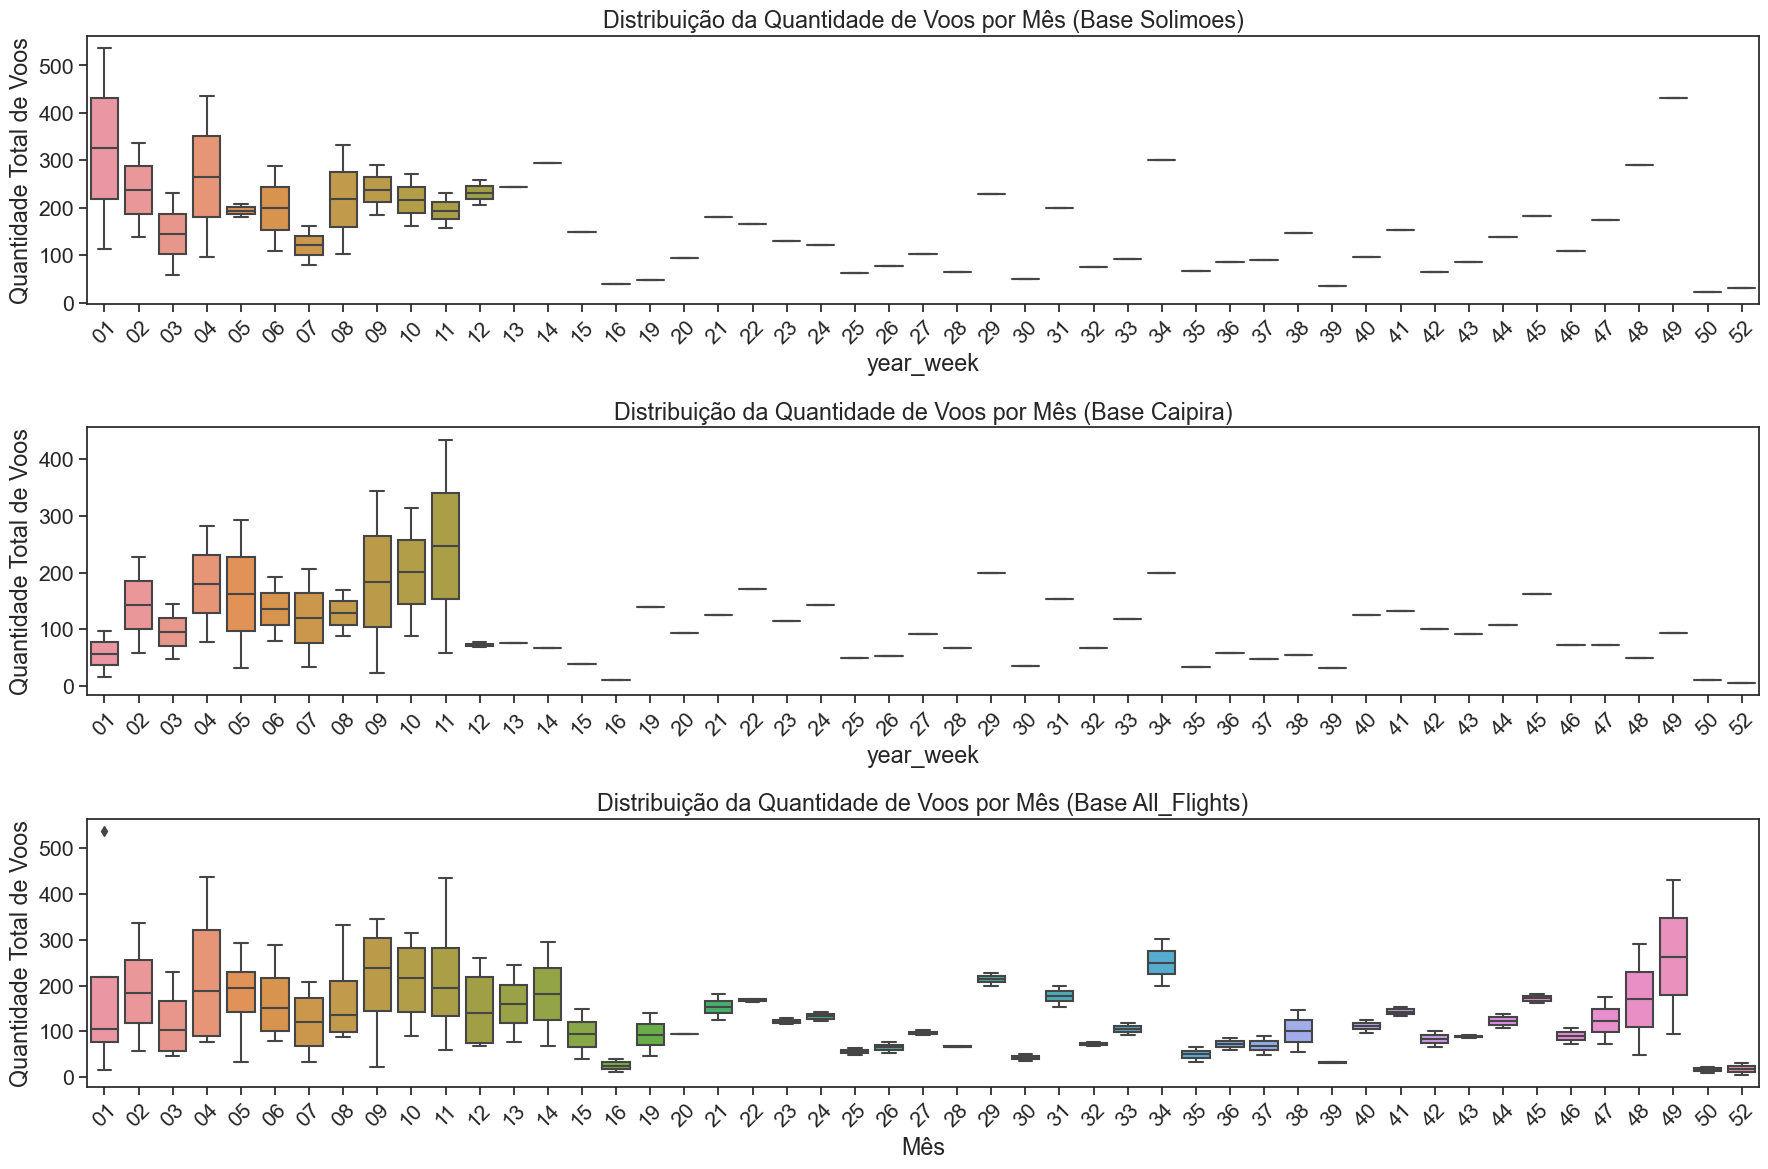

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a 'year_week' column
# If not, you can use the previous code to create it

# Filter data for the desired time period (January 2019 to December 2020)
start_date = '2019_01'
end_date = '2020_12'
rota_solimoes_filtered = rota_solimoes[(rota_solimoes['year_week'] >= start_date) & (rota_solimoes['year_week'] <= end_date)]
rota_caipira_filtered = rota_caipira[(rota_caipira['year_week'] >= start_date) & (rota_caipira['year_week'] <= end_date)]
all_flights_filtered = all_flights[(all_flights['year_week'] >= start_date) & (all_flights['year_week'] <= end_date)]

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(18, 12))

# Create a boxplot for Solimoes
sns.boxplot(data=rota_solimoes_filtered, x=rota_solimoes_filtered['year_week'].str[5:], y='total_flights', ax=axes[0])
axes[0].set_ylabel('Quantidade Total de Voos')
axes[0].set_title('Distribuição da Quantidade de Voos por Mês (Base Solimoes)')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Create a boxplot for Caipira
sns.boxplot(data=rota_caipira_filtered, x=rota_caipira_filtered['year_week'].str[5:], y='total_flights', ax=axes[1])
axes[1].set_ylabel('Quantidade Total de Voos')
axes[1].set_title('Distribuição da Quantidade de Voos por Mês (Base Caipira)')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

# Create a boxplot for All_Flights
sns.boxplot(data=all_flights_filtered, x=all_flights_filtered['year_week'].str[5:], y='total_flights', ax=axes[2])
axes[2].set_xlabel('Mês')
axes[2].set_ylabel('Quantidade Total de Voos')
axes[2].set_title('Distribuição da Quantidade de Voos por Mês (Base All_Flights)')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

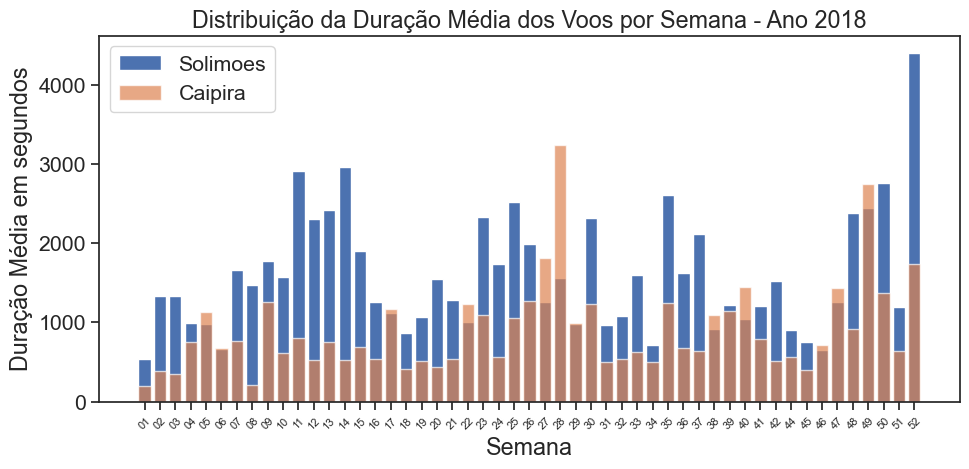

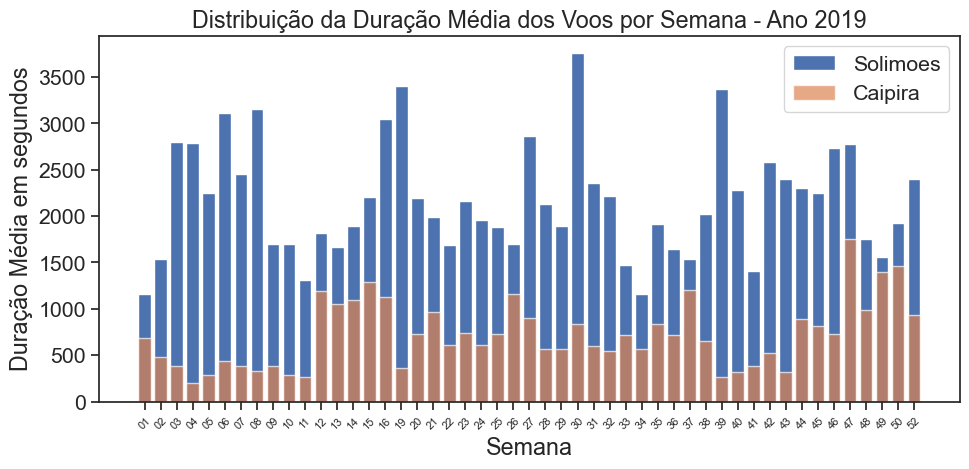

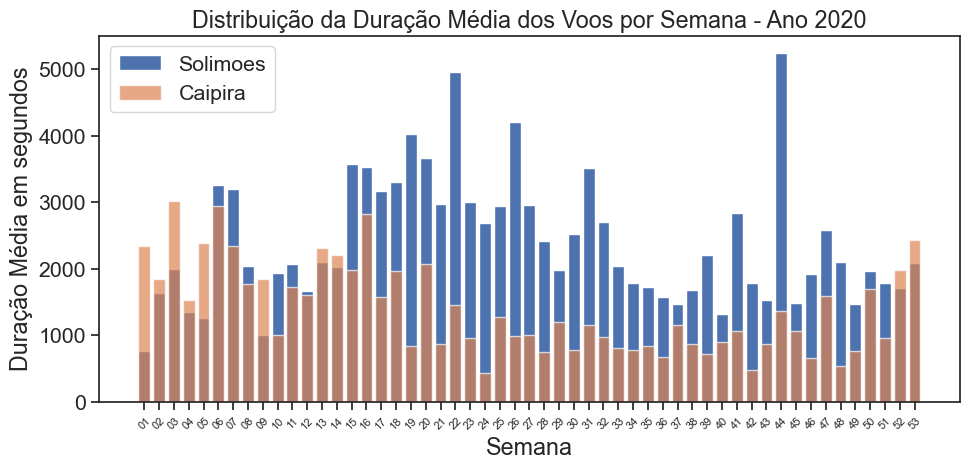

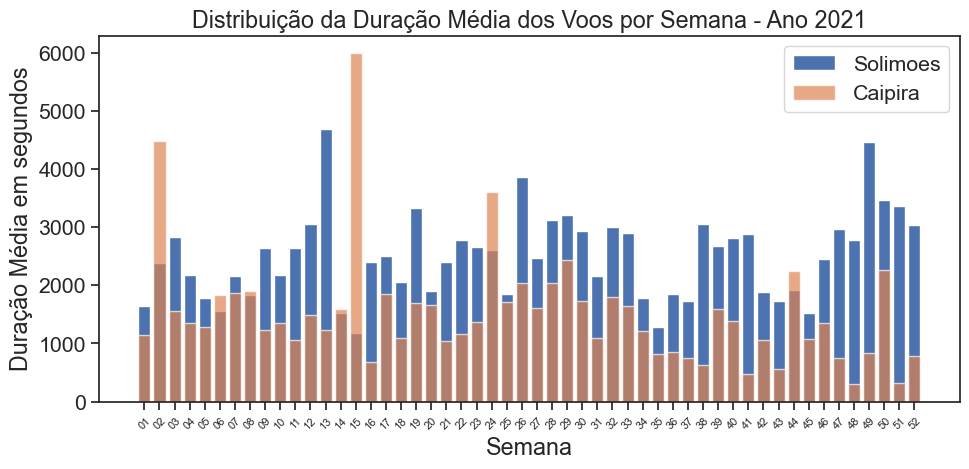

In [15]:
distribuicao_solimoes_tempo = rota_solimoes.groupby('year_week')['average_duration'].sum()

distribuicao_caipira_tempo = rota_caipira.groupby('year_week')['average_duration'].sum()

anos = ['2018', '2019', '2020', '2021']

for ano in anos:
    distribuicao_solimoes_ano_tempo = distribuicao_solimoes_tempo[distribuicao_solimoes_tempo.index.str.startswith(ano)]
    distribuicao_caipira_ano_tempo = distribuicao_caipira_tempo[distribuicao_caipira_tempo.index.str.startswith(ano)]

    plt.figure(figsize=(10, 5))
    plt.bar(distribuicao_solimoes_ano_tempo.index.str[-2:], distribuicao_solimoes_ano_tempo.values, label='Solimoes')
    plt.bar(distribuicao_caipira_ano_tempo.index.str[-2:], distribuicao_caipira_ano_tempo.values, label='Caipira', alpha=0.7)
    
    plt.xlabel('Semana')
    plt.ylabel('Duração Média em segundos')
    plt.title(f'Distribuição da Duração Média dos Voos por Semana - Ano {ano}')
    plt.xticks(rotation=45, fontsize=8)  
    plt.legend()
    plt.tight_layout()
    plt.show()

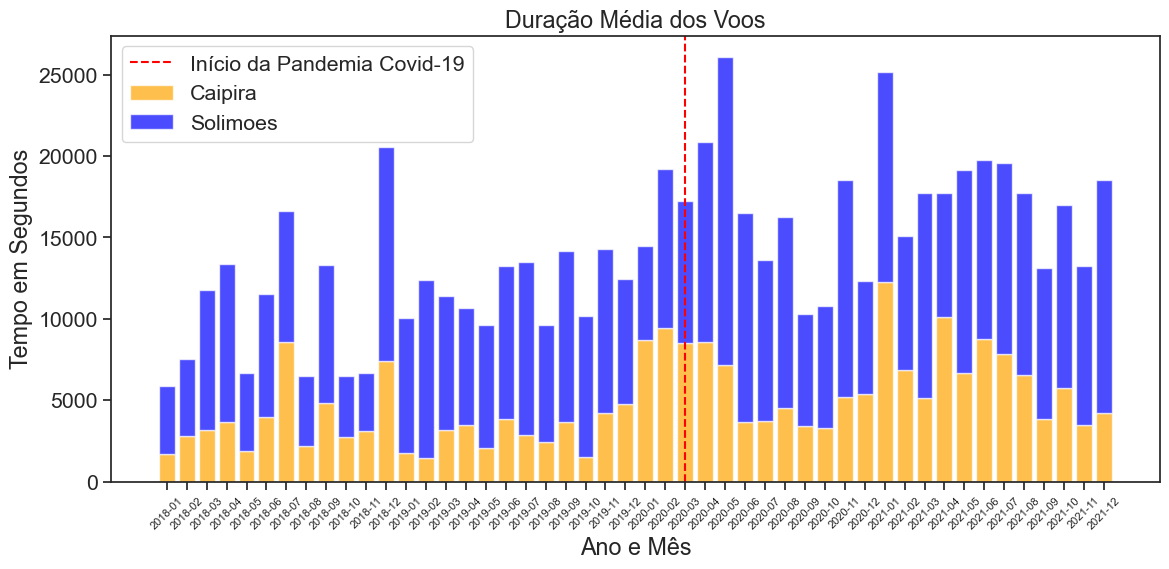

In [16]:
rota_solimoes['year_month'] = pd.to_datetime(rota_solimoes['year_week'] + '-0', format='%Y_%U-%w').dt.strftime('%Y-%m')
rota_caipira['year_month'] = pd.to_datetime(rota_caipira['year_week'] + '-0', format='%Y_%U-%w').dt.strftime('%Y-%m')

rota_solimoes['Rota'] = 'Solimoes'
rota_caipira['Rota'] = 'Caipira'
rotas_concatenadas = pd.concat([rota_solimoes, rota_caipira])

rotas_concatenadas = rotas_concatenadas[(rotas_concatenadas['year_month'] >= '2018-01') & (rotas_concatenadas['year_month'] <= '2021-12')]

distribuicao_rotas_tempo = rotas_concatenadas.groupby(['year_month', 'Rota'])['average_duration'].sum().unstack()

plt.figure(figsize=(12, 6))
colors = ['orange', 'blue']  
bottom = None
for rota, color in zip(distribuicao_rotas_tempo.columns, colors):
    plt.bar(distribuicao_rotas_tempo.index, distribuicao_rotas_tempo[rota], color=color, alpha=0.7, label=rota, bottom=bottom)
    if bottom is None:
        bottom = distribuicao_rotas_tempo[rota]
    else:
        bottom += distribuicao_rotas_tempo[rota]

plt.axvline(x='2020-03', color='red', linestyle='--', label='Início da Pandemia Covid-19')

plt.xticks(rotation=45, fontsize=8)

plt.xlabel('Ano e Mês')
plt.ylabel('Tempo em Segundos')
plt.title('Duração Média dos Voos')
plt.legend()
plt.tight_layout()
plt.show()

## Séries Temporais

### Para  a quantidade de vôos por semana

# Interromper na baseline

### Para o tempo médio de vôo por semana

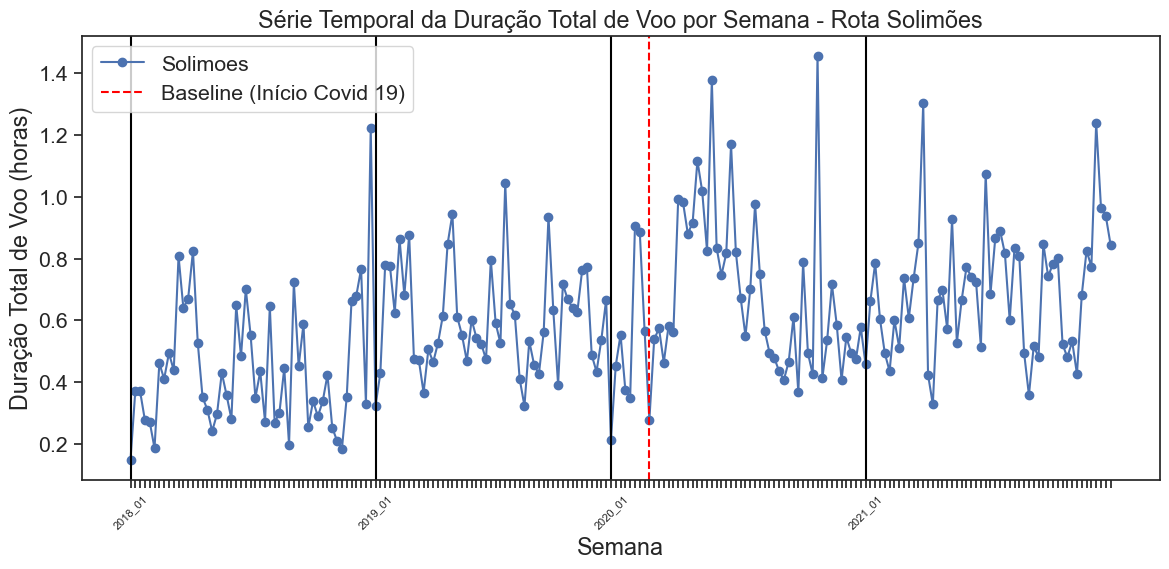

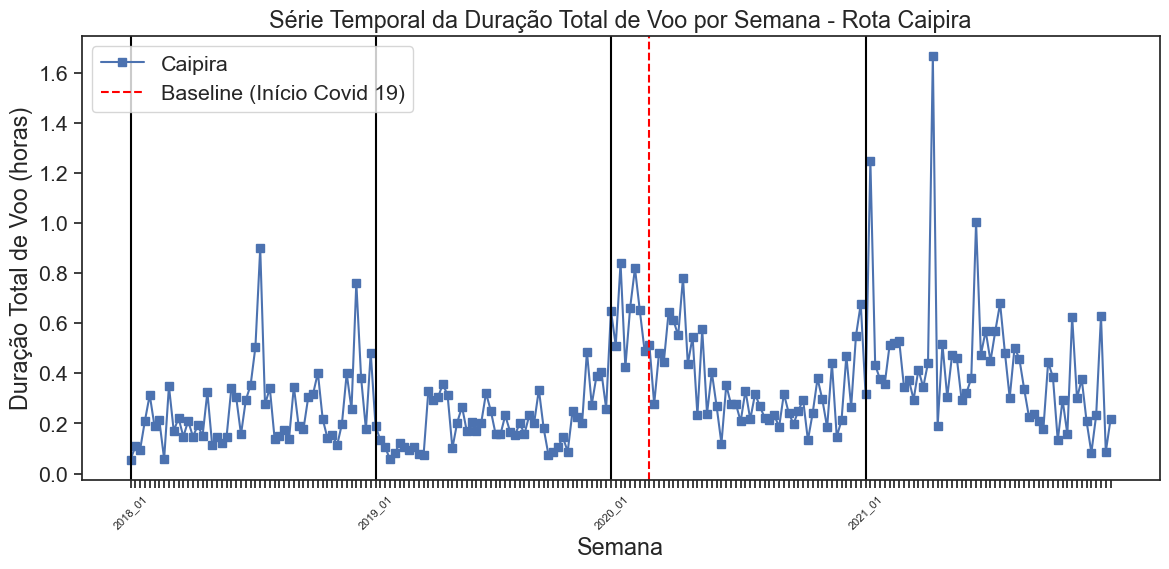

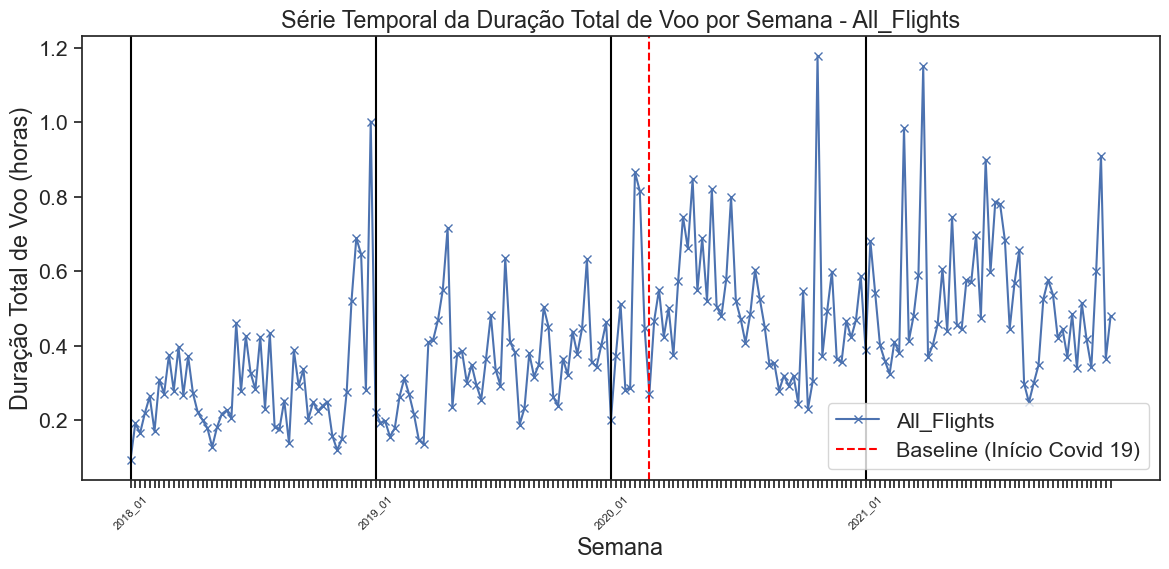

In [18]:
distribuicao_solimoes_tempo = rota_solimoes.groupby('year_week')['average_duration'].sum() / 3600
distribuicao_caipira_tempo = rota_caipira.groupby('year_week')['average_duration'].sum() / 3600
distribuicao_all_flights_tempo = all_flights.groupby('year_week')['average_duration'].sum() / 3600

# Configurar a linha de base em 2020_09 (em horas)
baseline = pd.Series([0], index=['2020_09'])

# Configurar o gráfico para Solimões
plt.figure(figsize=(12, 6))
plt.plot(distribuicao_solimoes_tempo.index, distribuicao_solimoes_tempo.values, label='Solimoes', marker='o')

# Marcar apenas a primeira semana de cada ano nas tick labels
ano_atual = None
tick_labels = []
for semana in distribuicao_solimoes_tempo.index:
    ano = semana.split('_')[0]
    if ano != ano_atual:
        tick_labels.append(semana)
        ano_atual = ano
    else:
        tick_labels.append('')
plt.xticks(distribuicao_solimoes_tempo.index, tick_labels, rotation=45, fontsize=8)

# Linha de base em 2020_09 estendida até o fim da base de dados
plt.axvline(x='2020_09', color='red', linestyle='--', label='Baseline (Início Covid 19)')
plt.axvline(x='2018_01', color='black', linestyle='-')
plt.axvline(x='2019_01', color='black', linestyle='-')
plt.axvline(x='2020_01', color='black', linestyle='-')
plt.axvline(x='2021_01', color='black', linestyle='-')

plt.xlabel('Semana')
plt.ylabel('Duração Total de Voo (horas)')
plt.title('Série Temporal da Duração Total de Voo por Semana - Rota Solimões')
plt.legend()
plt.tight_layout()
plt.show()

# Configurar o gráfico para Caipira
plt.figure(figsize=(12, 6))
plt.plot(distribuicao_caipira_tempo.index, distribuicao_caipira_tempo.values, label='Caipira', marker='s')

# Marcar apenas a primeira semana de cada ano nas tick labels
ano_atual = None
tick_labels = []
for semana in distribuicao_caipira_tempo.index:
    ano = semana.split('_')[0]
    if ano != ano_atual:
        tick_labels.append(semana)
        ano_atual = ano
    else:
        tick_labels.append('')
plt.xticks(distribuicao_caipira_tempo.index, tick_labels, rotation=45, fontsize=8)

# Linha de base em 2020_09 estendida até o fim da base de dados
plt.axvline(x='2020_09', color='red', linestyle='--', label='Baseline (Início Covid 19)')
plt.axvline(x='2018_01', color='black', linestyle='-')
plt.axvline(x='2019_01', color='black', linestyle='-')
plt.axvline(x='2020_01', color='black', linestyle='-')
plt.axvline(x='2021_01', color='black', linestyle='-')

plt.xlabel('Semana')
plt.ylabel('Duração Total de Voo (horas)')
plt.title('Série Temporal da Duração Total de Voo por Semana - Rota Caipira')
plt.legend()
plt.tight_layout()
plt.show()

# Configurar o gráfico para All_Flights
plt.figure(figsize=(12, 6))
plt.plot(distribuicao_all_flights_tempo.index, distribuicao_all_flights_tempo.values, label='All_Flights', marker='x')

# Marcar apenas a primeira semana de cada ano nas tick labels
ano_atual = None
tick_labels = []
for semana in distribuicao_all_flights_tempo.index:
    ano = semana.split('_')[0]
    if ano != ano_atual:
        tick_labels.append(semana)
        ano_atual = ano
    else:
        tick_labels.append('')
plt.xticks(distribuicao_all_flights_tempo.index, tick_labels, rotation=45, fontsize=8)

# Linha de base em 2020_09 estendida até o fim da base de dados
plt.axvline(x='2020_09', color='red', linestyle='--', label='Baseline (Início Covid 19)')
plt.axvline(x='2018_01', color='black', linestyle='-')
plt.axvline(x='2019_01', color='black', linestyle='-')
plt.axvline(x='2020_01', color='black', linestyle='-')
plt.axvline(x='2021_01', color='black', linestyle='-')

plt.xlabel('Semana')
plt.ylabel('Duração Total de Voo (horas)')
plt.title('Série Temporal da Duração Total de Voo por Semana - All_Flights')
plt.legend()
plt.tight_layout()
plt.show()

## Rolling Windows

# ADICIONAR BASELINE

In [42]:
window_size = 4 #(Mensal)


rota_solimoes['rolling_mean_duration'] = rota_solimoes['average_duration'].rolling(window=window_size).mean()
rota_caipira['rolling_mean_duration'] = rota_caipira['average_duration'].rolling(window=window_size).mean()
all_flights['rolling_mean_duration'] = all_flights['average_duration'].rolling(window=window_size).mean()

rota_solimoes['rolling_mean_flights'] = rota_solimoes['total_flights'].rolling(window=window_size).mean()
rota_caipira['rolling_mean_flights'] = rota_caipira['total_flights'].rolling(window=window_size).mean()
all_flights['rolling_mean_flights'] = all_flights['total_flights'].rolling(window=window_size).mean()

### Sazonalidade

In [58]:
#Preenchendo missings
rota_solimoes[column_name].fillna(rota_solimoes[column_name].mean(), inplace=True)
rota_caipira[column_name].fillna(rota_caipira[column_name].mean(), inplace=True)
all_flights[column_name].fillna(all_flights[column_name].mean(), inplace=True)

#### Solimões

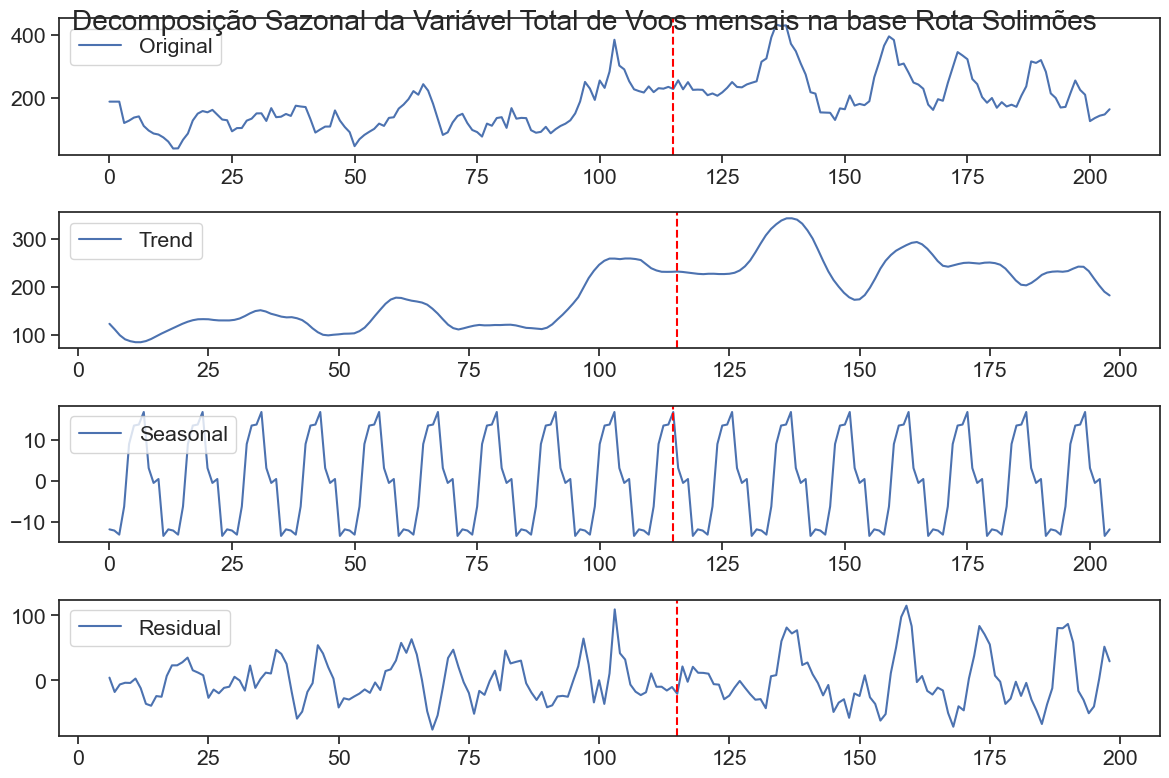

In [54]:
column_name = 'rolling_mean_flights'

# Defina o período de sazonalidade (por exemplo, 12 para dados mensais)
seasonal_period = 12

# Realize a decomposição sazonal
result = seasonal_decompose(rota_solimoes[column_name], period=seasonal_period)

# Plote os componentes da decomposição

plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(rota_solimoes.index, rota_solimoes[column_name], label='Original')
plt.legend(loc='upper left')

# Adicione a linha de base no ponto 115 do eixo x (tempo)
plt.axvline(x=115, color='red', linestyle='--', label='Baseline (Tempo 115)')

plt.subplot(412)
plt.plot(rota_solimoes.index, result.trend, label='Trend')
plt.legend(loc='upper left')

# Adicione a linha de base no ponto 115 do eixo x (tempo)
plt.axvline(x=115, color='red', linestyle='--', label='Baseline (Tempo 115)')

plt.subplot(413)
plt.plot(rota_solimoes.index, result.seasonal, label='Seasonal')
plt.legend(loc='upper left')

# Adicione a linha de base no ponto 115 do eixo x (tempo)
plt.axvline(x=115, color='red', linestyle='--', label='Baseline (Tempo 115)')

plt.subplot(414)
plt.plot(rota_solimoes.index, result.resid, label='Residual')
plt.legend(loc='upper left')

# Adicione a linha de base no ponto 115 do eixo x (tempo)
plt.axvline(x=115, color='red', linestyle='--', label='Baseline (Tempo 115)')

plt.tight_layout()
plt.suptitle('Decomposição Sazonal da Variável Total de Voos mensais na base Rota Solimões')

plt.show()

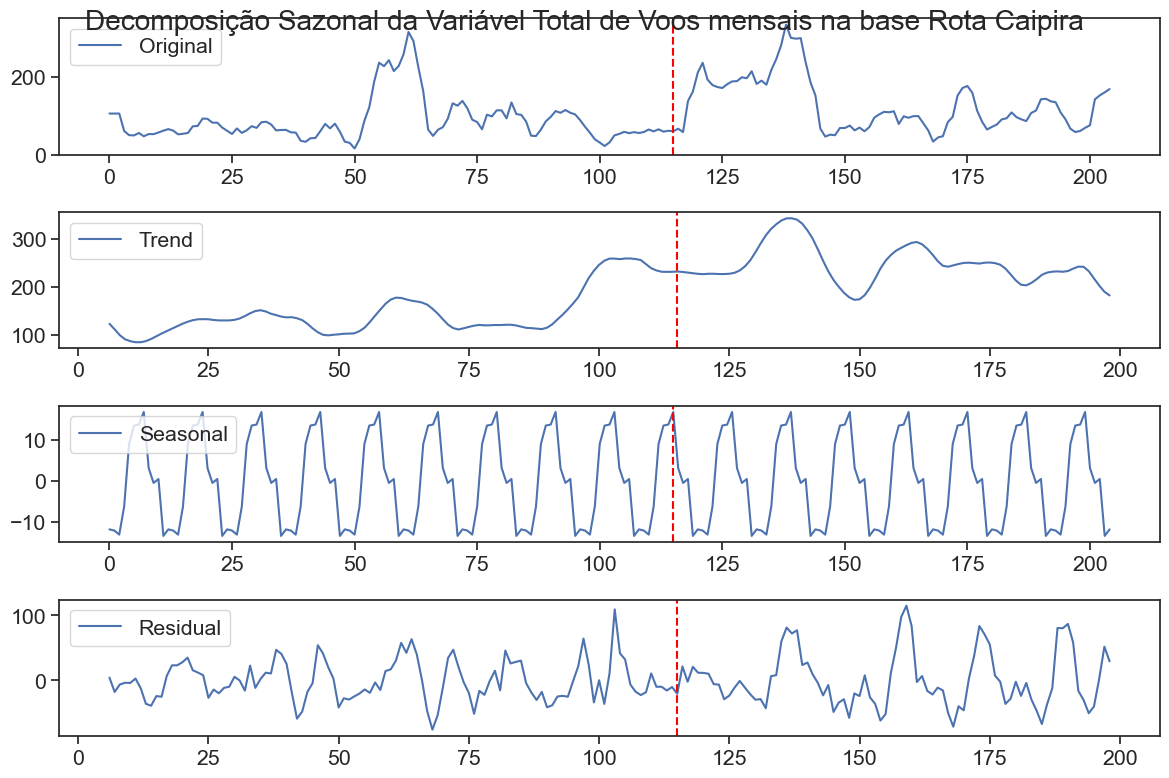

In [62]:
column_name = 'rolling_mean_duration'

# Defina o período de sazonalidade (por exemplo, 12 para dados mensais)
seasonal_period = 12

# Realize a decomposição sazonal
result = seasonal_decompose(rota_solimoes[column_name], period=seasonal_period)

# Plote os componentes da decomposição

plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(rota_solimoes.index, rota_solimoes[column_name], label='Original')
plt.legend(loc='upper left')

# Adicione a linha de base no ponto 115 do eixo x (tempo)
plt.axvline(x=115, color='red', linestyle='--', label='Baseline (Tempo 115)')

plt.subplot(412)
plt.plot(rota_solimoes.index, result.trend, label='Trend')
plt.legend(loc='upper left')

# Adicione a linha de base no ponto 115 do eixo x (tempo)
plt.axvline(x=115, color='red', linestyle='--', label='Baseline (Tempo 115)')

plt.subplot(413)
plt.plot(rota_solimoes.index, result.seasonal, label='Seasonal')
plt.legend(loc='upper left')

# Adicione a linha de base no ponto 115 do eixo x (tempo)
plt.axvline(x=115, color='red', linestyle='--', label='Baseline (Tempo 115)')

plt.subplot(414)
plt.plot(rota_solimoes.index, result.resid, label='Residual')
plt.legend(loc='upper left')

# Adicione a linha de base no ponto 115 do eixo x (tempo)
plt.axvline(x=115, color='red', linestyle='--', label='Baseline (Tempo 115)')

plt.tight_layout()
plt.suptitle('Decomposição Sazonal da Variável Duração Média na base Rota Solimões')

plt.show()

#### Rota Caipira

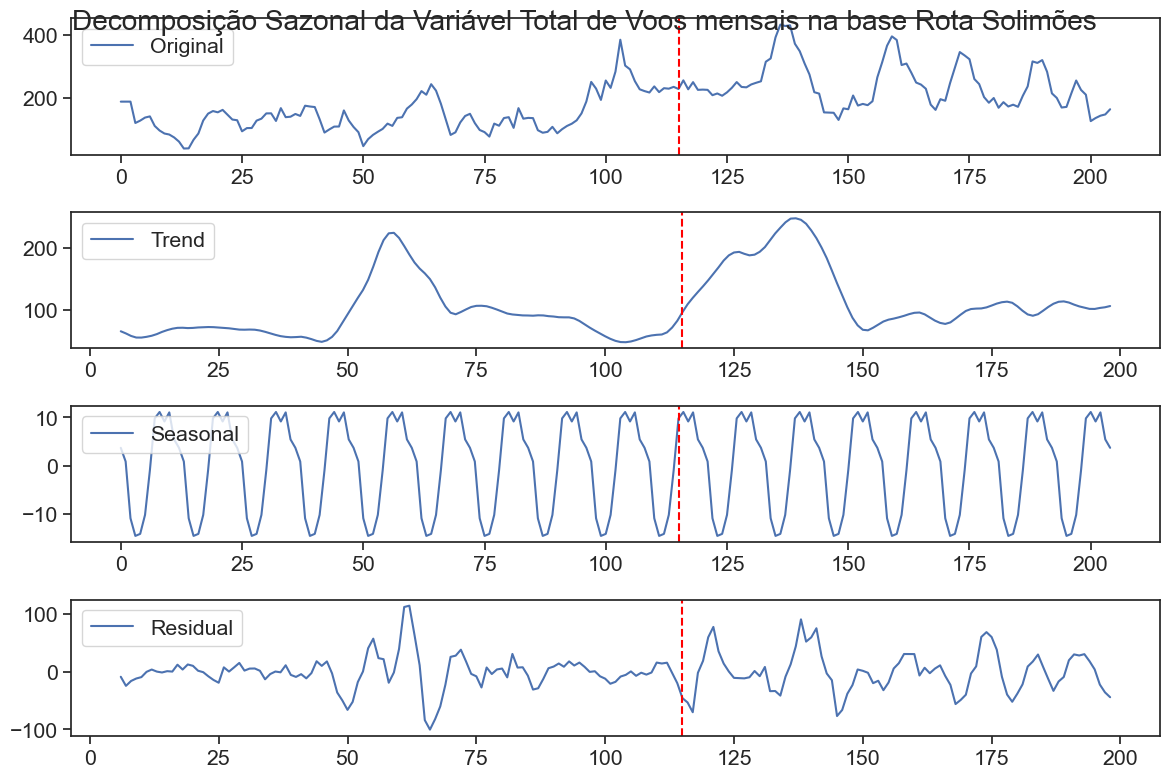

In [61]:
column_name = 'rolling_mean_flights'

# Defina o período de sazonalidade (por exemplo, 12 para dados mensais)
seasonal_period = 12

# Realize a decomposição sazonal
result = seasonal_decompose(rota_caipira[column_name], period=seasonal_period)

# Plote os componentes da decomposição

plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(rota_solimoes.index, rota_solimoes[column_name], label='Original')
plt.legend(loc='upper left')

# Adicione a linha de base no ponto 115 do eixo x (tempo)
plt.axvline(x=115, color='red', linestyle='--', label='Baseline (Tempo 115)')

plt.subplot(412)
plt.plot(rota_solimoes.index, result.trend, label='Trend')
plt.legend(loc='upper left')

# Adicione a linha de base no ponto 115 do eixo x (tempo)
plt.axvline(x=115, color='red', linestyle='--', label='Baseline (Tempo 115)')

plt.subplot(413)
plt.plot(rota_solimoes.index, result.seasonal, label='Seasonal')
plt.legend(loc='upper left')

# Adicione a linha de base no ponto 115 do eixo x (tempo)
plt.axvline(x=115, color='red', linestyle='--', label='Baseline (Tempo 115)')

plt.subplot(414)
plt.plot(rota_solimoes.index, result.resid, label='Residual')
plt.legend(loc='upper left')

# Adicione a linha de base no ponto 115 do eixo x (tempo)
plt.axvline(x=115, color='red', linestyle='--', label='Baseline (Tempo 115)')

plt.tight_layout()
plt.suptitle('Decomposição Sazonal da Variável Total de Voos mensais na base Rota Caipira')

plt.show()

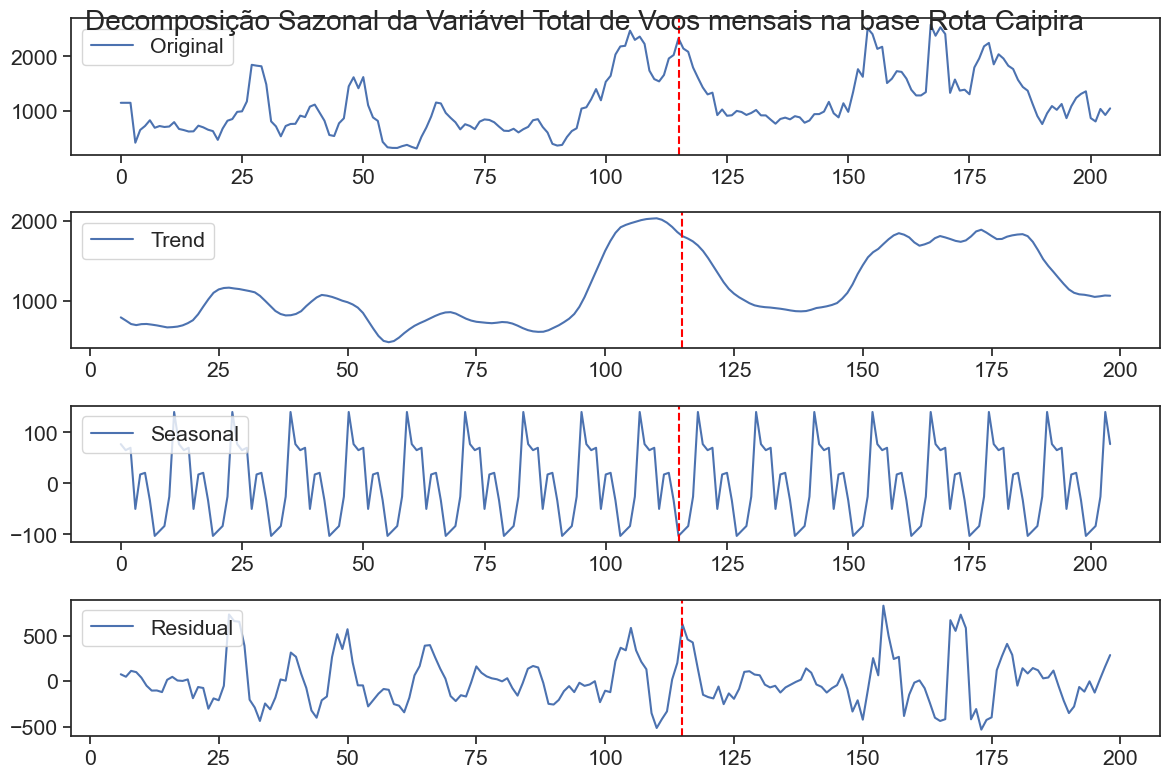

In [60]:
column_name = 'rolling_mean_duration'

# Defina o período de sazonalidade (por exemplo, 12 para dados mensais)
seasonal_period = 12

# Realize a decomposição sazonal
result = seasonal_decompose(rota_caipira[column_name], period=seasonal_period)

# Plote os componentes da decomposição

plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(rota_caipira.index, rota_caipira[column_name], label='Original')
plt.legend(loc='upper left')

# Adicione a linha de base no ponto 115 do eixo x (tempo)
plt.axvline(x=115, color='red', linestyle='--', label='Baseline (Tempo 115)')

plt.subplot(412)
plt.plot(rota_caipira.index, result.trend, label='Trend')
plt.legend(loc='upper left')

# Adicione a linha de base no ponto 115 do eixo x (tempo)
plt.axvline(x=115, color='red', linestyle='--', label='Baseline (Tempo 115)')

plt.subplot(413)
plt.plot(rota_caipira.index, result.seasonal, label='Seasonal')
plt.legend(loc='upper left')

# Adicione a linha de base no ponto 115 do eixo x (tempo)
plt.axvline(x=115, color='red', linestyle='--', label='Baseline (Tempo 115)')

plt.subplot(414)
plt.plot(rota_caipira.index, result.resid, label='Residual')
plt.legend(loc='upper left')

# Adicione a linha de base no ponto 115 do eixo x (tempo)
plt.axvline(x=115, color='red', linestyle='--', label='Baseline (Tempo 115)')

plt.tight_layout()
plt.suptitle('Decomposição Sazonal da Variável Duração Média na base Rota Caipira')

plt.show()

#### Bse All Flights

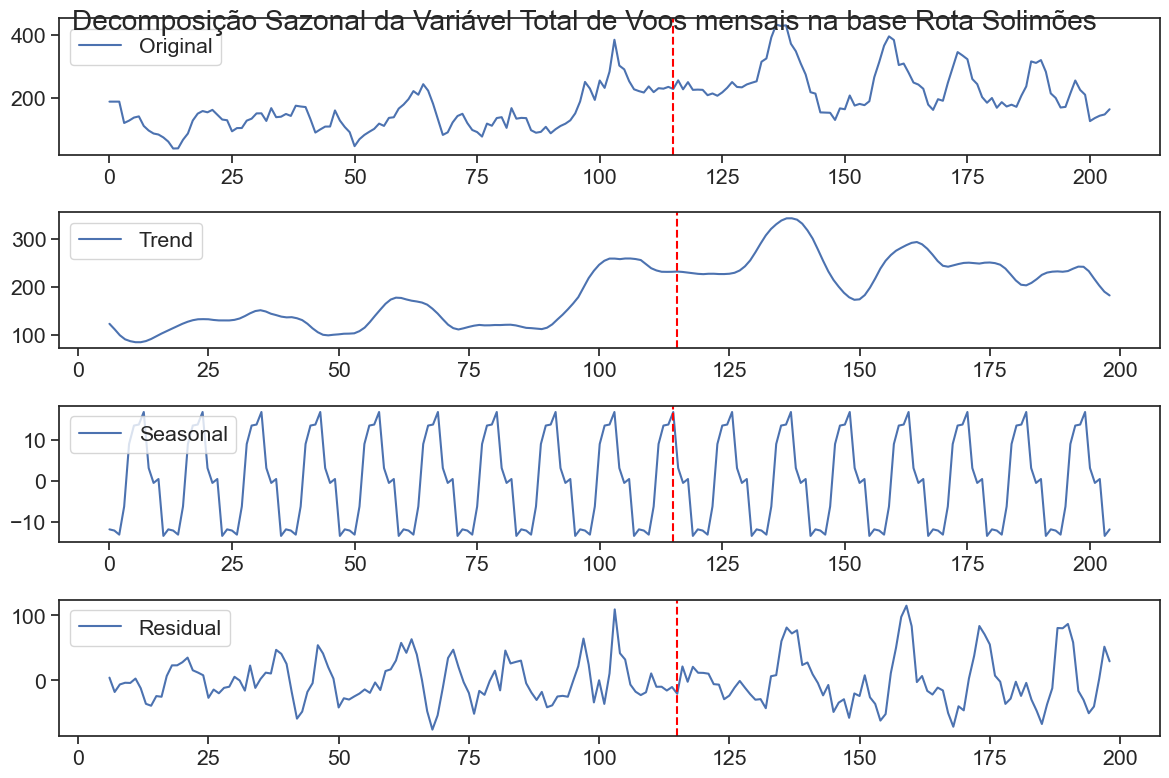

In [51]:
column_name = 'rolling_mean_flights'

# Defina o período de sazonalidade (por exemplo, 12 para dados mensais)
seasonal_period = 12

# Realize a decomposição sazonal
result = seasonal_decompose(all_flights[column_name], period=seasonal_period)

# Plote os componentes da decomposição

plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(rota_solimoes.index, rota_solimoes[column_name], label='Original')
plt.legend(loc='upper left')

# Adicione a linha de base no ponto 115 do eixo x (tempo)
plt.axvline(x=115, color='red', linestyle='--', label='Baseline (Tempo 115)')

plt.subplot(412)
plt.plot(rota_solimoes.index, result.trend, label='Trend')
plt.legend(loc='upper left')

# Adicione a linha de base no ponto 115 do eixo x (tempo)
plt.axvline(x=115, color='red', linestyle='--', label='Baseline (Tempo 115)')

plt.subplot(413)
plt.plot(rota_solimoes.index, result.seasonal, label='Seasonal')
plt.legend(loc='upper left')

# Adicione a linha de base no ponto 115 do eixo x (tempo)
plt.axvline(x=115, color='red', linestyle='--', label='Baseline (Tempo 115)')

plt.subplot(414)
plt.plot(rota_solimoes.index, result.resid, label='Residual')
plt.legend(loc='upper left')

# Adicione a linha de base no ponto 115 do eixo x (tempo)
plt.axvline(x=115, color='red', linestyle='--', label='Baseline (Tempo 115)')

plt.tight_layout()
plt.suptitle('Decomposição Sazonal da Variável Total de Voos mensais na base Total')

plt.show()

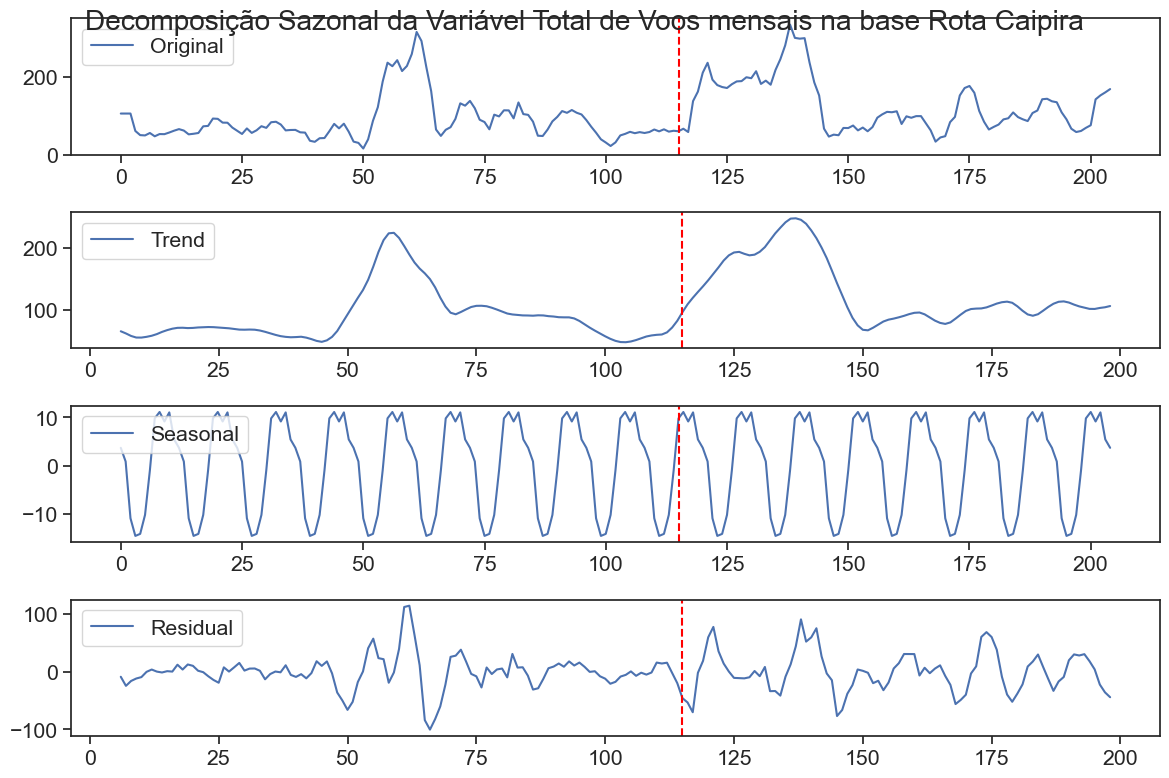

In [52]:
column_name = 'rolling_mean_duration'

# Defina o período de sazonalidade (por exemplo, 12 para dados mensais)
seasonal_period = 12

# Realize a decomposição sazonal
result = seasonal_decompose(all_flights[column_name], period=seasonal_period)

# Plote os componentes da decomposição

plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(rota_solimoes.index, rota_solimoes[column_name], label='Original')
plt.legend(loc='upper left')

# Adicione a linha de base no ponto 115 do eixo x (tempo)
plt.axvline(x=115, color='red', linestyle='--', label='Baseline (Tempo 115)')

plt.subplot(412)
plt.plot(rota_solimoes.index, result.trend, label='Trend')
plt.legend(loc='upper left')

# Adicione a linha de base no ponto 115 do eixo x (tempo)
plt.axvline(x=115, color='red', linestyle='--', label='Baseline (Tempo 115)')

plt.subplot(413)
plt.plot(rota_solimoes.index, result.seasonal, label='Seasonal')
plt.legend(loc='upper left')

# Adicione a linha de base no ponto 115 do eixo x (tempo)
plt.axvline(x=115, color='red', linestyle='--', label='Baseline (Tempo 115)')

plt.subplot(414)
plt.plot(rota_solimoes.index, result.resid, label='Residual')
plt.legend(loc='upper left')

# Adicione a linha de base no ponto 115 do eixo x (tempo)
plt.axvline(x=115, color='red', linestyle='--', label='Baseline (Tempo 115)')

plt.tight_layout()
plt.suptitle('Decomposição Sazonal da Variável Duração Média na base Total')

plt.show()

## Interrupted Time Series (ITS)

## HeatMap

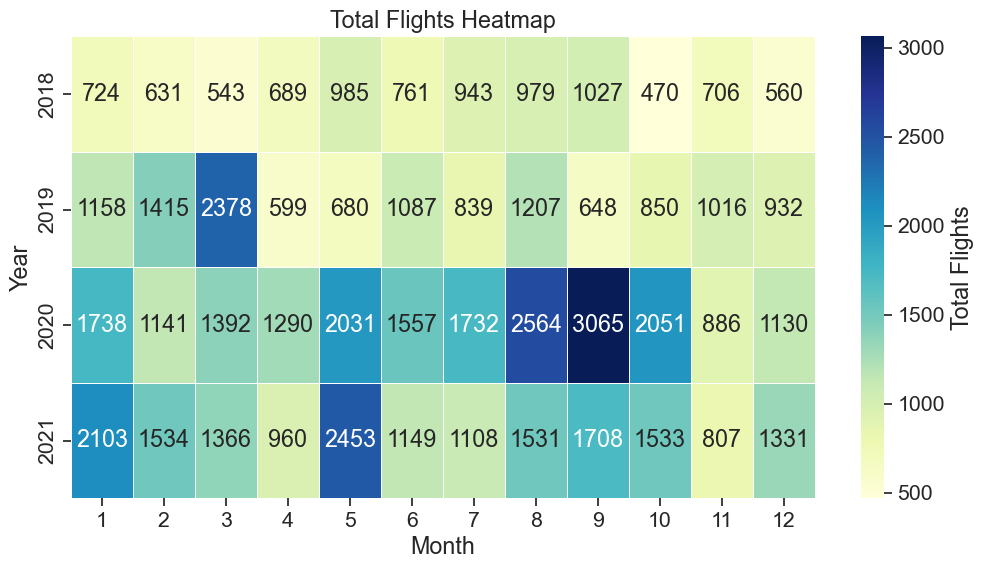

In [29]:
combined_df = pd.concat([rota_solimoes, rota_caipira])

# Extract year and month from 'year_week' column
combined_df['Year'] = pd.to_datetime(combined_df['year_week'] + '-0', format='%Y_%U-%w').dt.year
combined_df['Month'] = pd.to_datetime(combined_df['year_week'] + '-0', format='%Y_%U-%w').dt.month

# Define the order of months
month_order = range(1, 13)  # 1 to 12 for January to December

# Create a pivot table to prepare data for the heatmap
pivot_table = combined_df.pivot_table(index='Year', columns='Month', values='total_flights', aggfunc='sum', fill_value=0)

# Reorder columns based on month_order
pivot_table = pivot_table[month_order]

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5, cbar_kws={'label': 'Total Flights'})
plt.title('Total Flights Heatmap')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

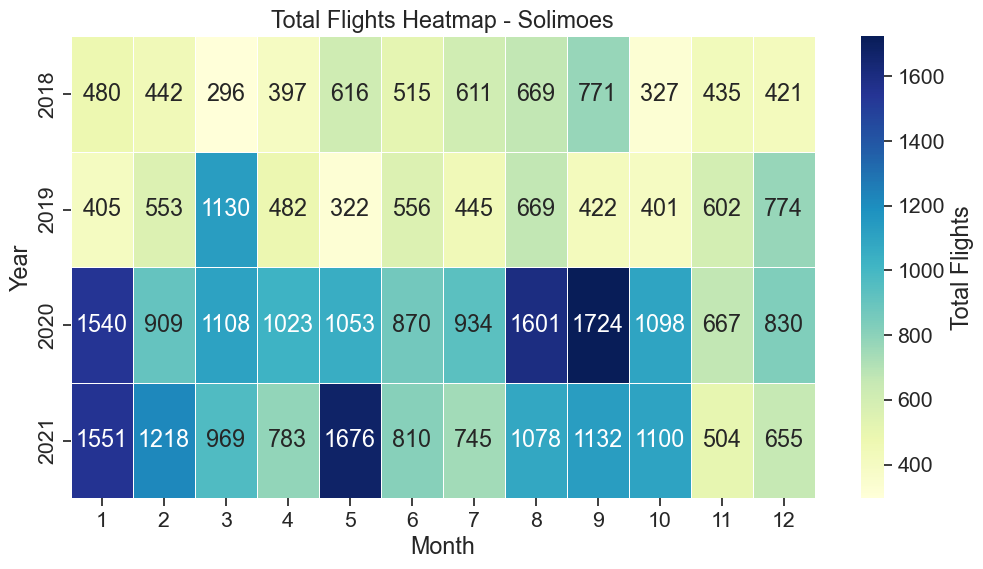

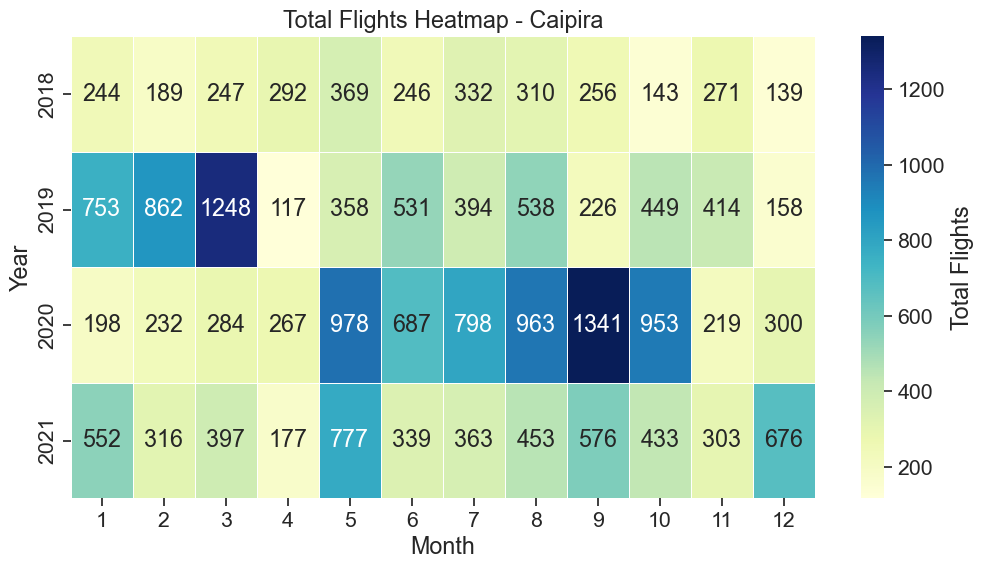

In [30]:
rota_solimoes['Year'] = pd.to_datetime(rota_solimoes['year_week'] + '-0', format='%Y_%U-%w').dt.year
rota_solimoes['Month'] = pd.to_datetime(rota_solimoes['year_week'] + '-0', format='%Y_%U-%w').dt.month

# Extract year and month from 'year_week' column for Caipira
rota_caipira['Year'] = pd.to_datetime(rota_caipira['year_week'] + '-0', format='%Y_%U-%w').dt.year
rota_caipira['Month'] = pd.to_datetime(rota_caipira['year_week'] + '-0', format='%Y_%U-%w').dt.month

# Define the order of months
month_order = range(1, 13)  # 1 to 12 for January to December

# Create pivot tables to prepare data for the heatmaps
pivot_table_solimoes = rota_solimoes.pivot_table(index='Year', columns='Month', values='total_flights', aggfunc='sum', fill_value=0)
pivot_table_caipira = rota_caipira.pivot_table(index='Year', columns='Month', values='total_flights', aggfunc='sum', fill_value=0)

# Reorder columns based on month_order
pivot_table_solimoes = pivot_table_solimoes[month_order]
pivot_table_caipira = pivot_table_caipira[month_order]

# Create the heatmap for Solimoes
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table_solimoes, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5, cbar_kws={'label': 'Total Flights'})
plt.title('Total Flights Heatmap - Solimoes')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

# Create the heatmap for Caipira
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table_caipira, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5, cbar_kws={'label': 'Total Flights'})
plt.title('Total Flights Heatmap - Caipira')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()